In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

### Spiral Animation ###
*How to create Animations*

The `PlotnineAnimation` methods takes a sequence of plots and animates them. The best way to create the sequence is
to use a function that generates plots.

**NOTE**: When creating the plots make sure *all the plots* have scales with the same limits for each aesthetic,
including the `x` and `y` aesthetics.

In [2]:
# Parameters used to control the spiral
n = 100
tightness = 1.3
kmin = 1
kmax = 25
num_frames = 25
theta = np.linspace(-np.pi, np.pi, n)

def plot(k):
    # For every plot we change the theta
    _theta = theta*k
    
    # Polar Equation of each spiral
    r = tightness*_theta
    
    df = pd.DataFrame({
        'theta': _theta,
        'r': r,
        'x': r*np.sin(_theta),
        'y': r*np.cos(_theta)
    })

    p = (ggplot(df)
         + geom_path(aes('x', 'y', color='theta'), size=1)
         + lims(
             # All the plots have scales with the same limits
             x=(-130, 130),
             y=(-130, 130),
             color=(-kmax*np.pi, kmax*np.pi)
         )
         + theme_void()
         + theme(
             aspect_ratio=1,
             # Make room on the right for the legend
             subplots_adjust={'right': 0.85}
         )
    )
    return p

# It is better to use a generator instead of a list
plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani

The final image of the spiral

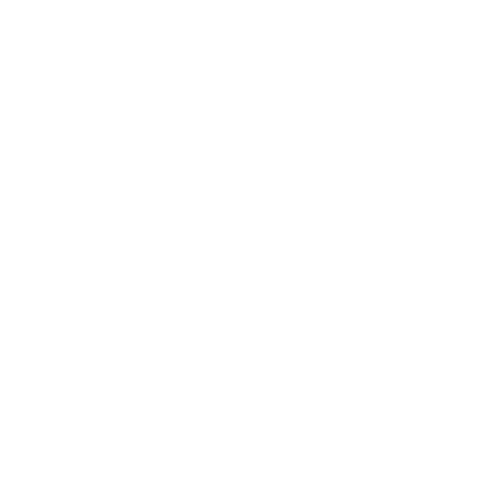

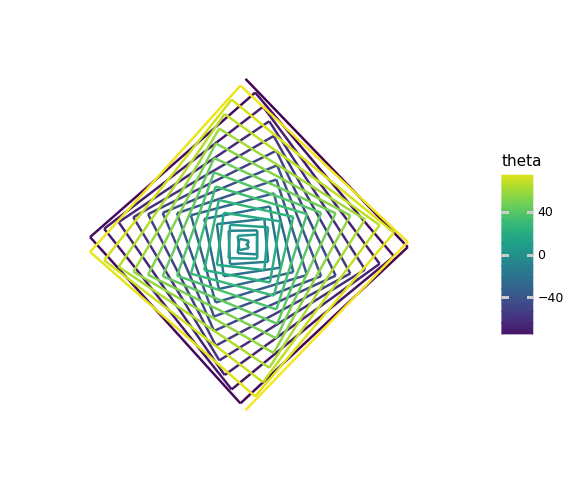

<ggplot: (97654321012345679)>

In [3]:
plot(kmax)